<a href="https://colab.research.google.com/github/2402597/SBE3136-Lab-Project-2402597/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tensorflow as tf


In [7]:
print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)


scikit-learn version: 1.6.1
TensorFlow version: 2.19.0


In [8]:
file_loc = 'https://storage.googleapis.com/low-code-ai-book/churn_dataset.csv'
df_raw = pd.read_csv(file_loc)

df_raw.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
mask = (df_raw['TotalCharges'] == ' ')
df_raw[mask].head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [11]:
df_1 = df_raw.replace({'TotalCharges': {' ': 0.0}})
mask = (df_raw['tenure'] == 0)
df_1[mask][['tenure','TotalCharges']]


,tenure,TotalCharges
488,0,0.0
753,0,0.0
936,0,0.0
1082,0,0.0
1340,0,0.0
3331,0,0.0
3826,0,0.0
4380,0,0.0
5218,0,0.0
6670,0,0.0


In [12]:
df_2 = df_1.astype({'TotalCharges': 'float64'})
df_2.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [13]:
df_2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df_2.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [15]:
df_2.value_counts(['PhoneService', 'MultipleLines'])



PhoneService  MultipleLines   
Yes           No                  3390
              Yes                 2971
No            No phone service     682
Name: count, dtype: int64

<Axes: xlabel='Contract'>

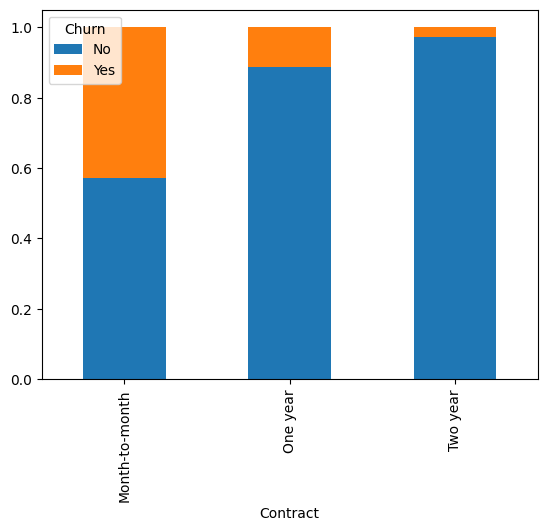

In [16]:
(df_2.groupby('Contract')['Churn'].value_counts(normalize=True)
 .unstack('Churn')
 .plot.bar(stacked=True))


/tmp/ipython-input-3367634010.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2.groupby('DiffBuckets')['Churn'].value_counts(normalize=True).unstack('Churn').plot.bar(stacked=True)


<Axes: xlabel='DiffBuckets'>

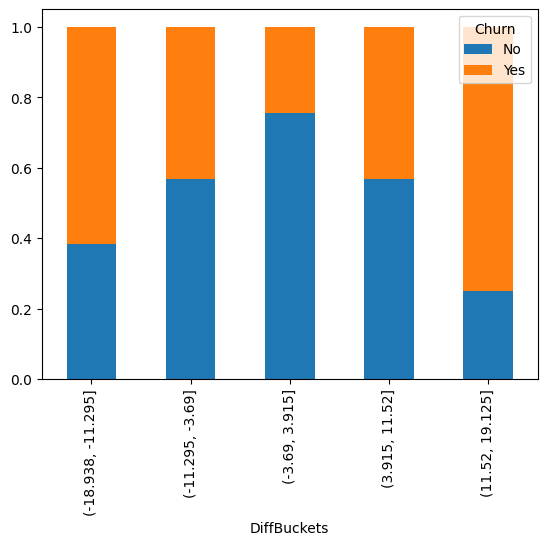

In [17]:
df_2['AvgMonthlyCharge'] = df_2['TotalCharges'].div(df_2['tenure']).replace(np.inf, np.nan)

df_2['DiffCharges'] = df_2['MonthlyCharges'] - df_2['AvgMonthlyCharge']

df_2['DiffBuckets'] = pd.cut(df_2['DiffCharges'], bins=5)

df_2.groupby('DiffBuckets')['Churn'].value_counts(normalize=True).unstack('Churn').plot.bar(stacked=True)


In [20]:
df_3 = df_2.copy()

df_3 = df_3.drop(columns=['customerID'])

df_3 = df_3.drop(columns=['gender', 'StreamingTV', 'StreamingMovies', 'PhoneService'])

df_3 = df_3.drop(columns=[
    'TotalCharges', 'AvgMonthlyCharge', 'DiffCharges'
], errors='ignore')

df_prep = df_3.replace({'No internet service': 'No'})

df_prep[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']].nunique()

df_prep.columns


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'DiffBuckets'],
      dtype='object')

In [21]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                       'InternetService', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'Contract', 'PaperlessBilling',
                       'PaymentMethod']

X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]

ohe = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')
X_cat_trans = ohe.fit_transform(X_cat)

X = np.concatenate((X_num.values, X_cat_trans), axis=1)


y = (df_prep['Churn'] == 'Yes').astype(int).values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=113
)

X_train.shape


(5634, 22)

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

cls = LogisticRegression()
cls.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)

cls.score(X_test_scaled, y_test)


0.7984386089425124

In [27]:
from sklearn.metrics import precision_score, recall_score

y_pred = cls.predict(X_test_scaled)

print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))



Precision: 0.6517241379310345
Recall: 0.5080645161290323


In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[189, 183],
       [101, 936]])